In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score

# Get the Data


In [5]:
car_details = pd.read_csv(r"J:\Data Science\Projects\Linear Regression\Car Details\CAR DETAILS FROM CAR DEKHO.csv")

In [7]:
car_details.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [9]:
car_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [11]:
car_details.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [13]:
car_details.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [15]:
car_details.shape

(4340, 8)

In [17]:
car_details.duplicated().sum()

763

In [19]:
car_details[car_details.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner


In [21]:
# Removing duplicates to avoid issues in model building

In [23]:
car_df = car_details.drop_duplicates()
car_df.duplicated().sum()
car_df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [25]:
print(car_details["fuel"].unique())
print(car_details["seller_type"].unique())
print(car_details["transmission"].unique())
print(car_details["owner"].unique())

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


# Dropping Columns


In [32]:
car_df.drop(["name"], axis = 1, inplace = True)

C:\Users\jaigo\AppData\Local\Temp\ipykernel_19504\3890133545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_df.drop(["name"], axis = 1, inplace = True)


In [40]:
# Dropping electric car since it has only one data, it give issues in model training
car_df.drop(car_df[car_df['fuel'] == 'Electric'].index, inplace=True)

C:\Users\jaigo\AppData\Local\Temp\ipykernel_19504\2584818181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_df.drop(car_df[car_df['fuel'] == 'Electric'].index, inplace=True)


In [34]:
print(car_df)

      year  selling_price  km_driven    fuel seller_type transmission  \
0     2007          60000      70000  Petrol  Individual       Manual   
1     2007         135000      50000  Petrol  Individual       Manual   
2     2012         600000     100000  Diesel  Individual       Manual   
3     2017         250000      46000  Petrol  Individual       Manual   
4     2014         450000     141000  Diesel  Individual       Manual   
...    ...            ...        ...     ...         ...          ...   
4335  2014         409999      80000  Diesel  Individual       Manual   
4336  2014         409999      80000  Diesel  Individual       Manual   
4337  2009         110000      83000  Petrol  Individual       Manual   
4338  2016         865000      90000  Diesel  Individual       Manual   
4339  2016         225000      40000  Petrol  Individual       Manual   

             owner  
0      First Owner  
1      First Owner  
2      First Owner  
3      First Owner  
4     Second Owner

In [42]:
# Split our data

X = car_df.drop(["selling_price"], axis = 1)
y = car_df["selling_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [44]:
# Categorical Variables
categorical_vars = ["fuel", "seller_type", "transmission", "owner"]

one_hot_encoder = OneHotEncoder(sparse_output = False, drop = "first")  

X_train_encoded = one_hot_encoder.fit_transform(X_train[categorical_vars])
X_test_encoded = one_hot_encoder.transform(X_test[categorical_vars])

encoder_feature_names = one_hot_encoder.get_feature_names_out(categorical_vars)

X_train_encoded = pd.DataFrame(X_train_encoded, columns = encoder_feature_names)
X_train = pd.concat([X_train.reset_index(drop = True), X_train_encoded.reset_index(drop = True)], axis = 1) 
X_train.drop(categorical_vars, axis = 1, inplace = True)

X_test_encoded = pd.DataFrame(X_test_encoded, columns = encoder_feature_names)
X_test = pd.concat([X_test.reset_index(drop = True), X_test_encoded.reset_index(drop = True)], axis = 1) 
X_test.drop(categorical_vars, axis = 1, inplace = True)

In [79]:
# Model Training
regressor_tree = DecisionTreeRegressor(random_state = 42, max_depth = 8)
regressor_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=42)

In [81]:
# Predict on the test

y_pred = regressor_tree.predict(X_test)

In [83]:
# calculate R-Squared

r_squared = r2_score(y_test, y_pred)
print(r_squared)

0.5348549077174487


In [85]:
# Cross validation

cv = KFold(n_splits = 4, shuffle= True, random_state= 42)       # Updating no of folds and enabling shuffle
cv_scores = cross_val_score(regressor_tree, X_train, y_train, cv = cv, scoring = "r2")
cv_scores.mean() 

0.008193111047464535

In [87]:
# Calculate Adjusted R-Squared

num_data_points, num_input_vars = X_test.shape

adjusted_r_squared = 1 - (1 - r_squared) * (num_data_points - 1) / (num_data_points - num_input_vars - 1)
print(adjusted_r_squared)

0.5269150199402217


In [89]:
# A demostration of Overfitting

y_pred_training = regressor_tree.predict(X_train)
r2_score(y_train, y_pred_training)

0.7416310459448612

In [91]:
# Finding the max_depth

max_depth_list = list(range(1,11))
accuracy_scores = []

for depth in max_depth_list:
    regressor_tree = DecisionTreeRegressor(max_depth = depth, random_state = 42)
    regressor_tree.fit(X_train, y_train)
    y_pred = regressor_tree.predict(X_test)
    accuracy = r2_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
max_accuracy = max(accuracy_scores)
max_accuracy_idx = accuracy_scores.index(max_accuracy)
optimal_depth = max_depth_list[max_accuracy_idx]


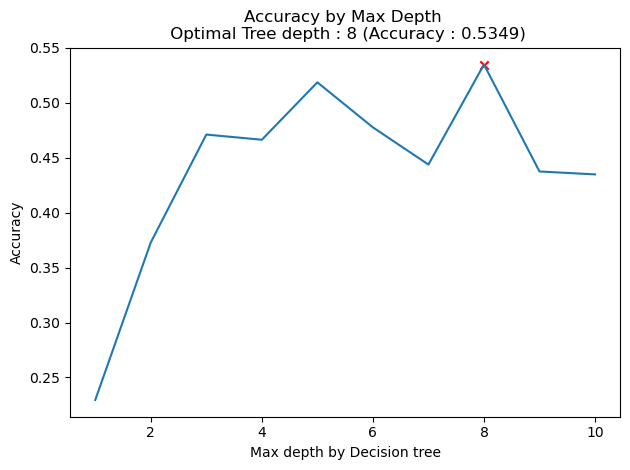

In [93]:
# Plot of Max depth

plt.plot(max_depth_list, accuracy_scores)
plt.scatter(optimal_depth, max_accuracy, marker = "x", color = "red")
plt.title(f"Accuracy by Max Depth \n Optimal Tree depth : {optimal_depth} (Accuracy : {round(max_accuracy,4)})")
plt.xlabel("Max depth by Decision tree")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()


# Taking 8 as the max_depth. Since our model has less data, max_accuracy is taken here to avoid overfitting.
# Decision Tree regression is done and the r2_score of 52 is achieved